# Batch Gradient Descent

asdfasdf

### Libraries Import

In [112]:
import numpy as np
import matplotlib.pyplot as plt

### Initial Configuration

In [113]:
# Defining target function for approximation
target_function = lambda x: np.sin(x)

# Data generation
domain_start = 0.0
domain_end = 4 * np.pi
sample_size = 200

# Network hyperparameters
hidden_neurons = 32
learning_rate = 0.03
intermediate_generations = 50000
total_generations = 200000

# Activation function
activation_function = "sigmoid"

# Matplotlib setup
plt.style.use("ggplot")
%matplotlib inline

### Activation Functions

In [114]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_d(x):
    s = sigmoid(x)
    return s * (1 - s)

# Tanh
def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - np.tanh(x)**2

# ReLU
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

# Function dictionary
activations ={"sigmoid": (sigmoid, sigmoid_d), "tanh": (tanh, tanh_d), "relu": (relu, relu_d)}

selected_activation, selected_derivative = activations[activation_function]

### Visualizing Target Function

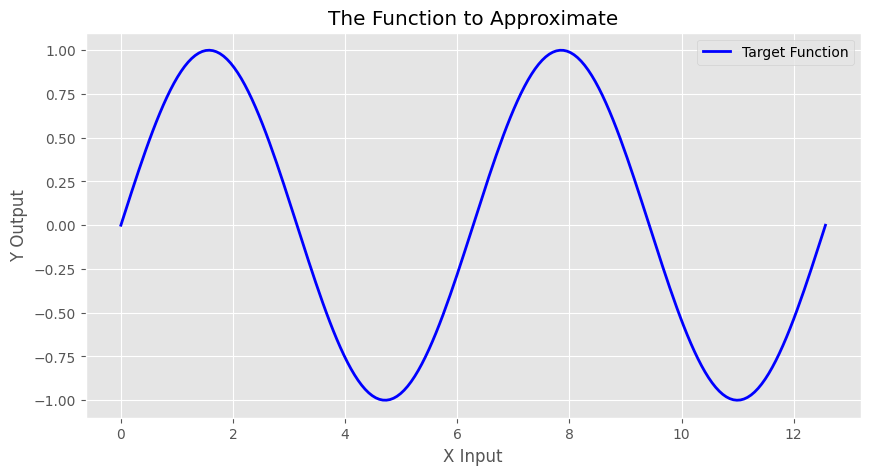

In [115]:
# Generation of vertical input vector
X = np.linspace(domain_start, domain_end, sample_size).reshape(-1, 1)

# Generation of horizontal target vector
Y = target_function(X)

# Plotting the target function
plt.figure(figsize=(10, 5))
plt.plot(X, Y, label="Target Function", color="blue", linewidth=2)
plt.title("The Function to Approximate")
plt.xlabel("X Input")
plt.ylabel("Y Output")
plt.legend()
plt.show()

### Neural Network via Batch Gradient Descent

In [116]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr, act_func, act_deriv):
        self.lr = lr
        self.act_func = act_func
        self.act_deriv = act_deriv

        # Initializing weights and with small values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1

        # Initializing biases with zeros
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Input Layer -> Hidden Layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.act_func(self.z1)

        # Hidden Layer -> Output Layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y, output):
        # The batch size is equal to the sample size
        batch_size = sample_size

        # Defining the error
        error = output - y

        # Gradient for output layer
        d_output = error * 1

        dW2 = np.dot(self.a1.T, d_output) / batch_size
        db2 = np.sum(d_output, axis=0, keepdims=True) / batch_size

        # Gradient for hidden layer
        d_hidden = np.dot(d_output, self.W2.T) * self.act_deriv(self.z1)

        dW1 = np.dot(X.T, d_hidden) / batch_size
        db1 = np.sum(d_hidden, axis=0, keepdims=True) / batch_size

        # Gradient descent step
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

        # Mean squared error
        return np.mean(np.square(error))

### Model Training

In [117]:
# 1. Instantiate the Model
model = NeuralNetwork(input_size=1, hidden_size=hidden_neurons, output_size=1, lr=learning_rate, act_func=selected_activation, act_deriv=selected_derivative)

loss_history = []

# Intermediate Training
print(f"Training for {intermediate_generations} generations...")
for i in range(intermediate_generations):
    # Forward pass
    prediction = model.forward(X)

    # Backward pass
    loss = model.backward(X, Y, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 5000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Snapshot: Get predictions at this early stage
print("Intermediate Training Complete.")
prediction_intermediate = model.forward(X)

# 3. Phase 2: Complete Training
remaining_generations = total_generations - intermediate_generations
print(f"Training for further {remaining_generations} generations...")

for i in range(remaining_generations):
    # Forward pass
    prediction = model.forward(X)

    # Backward pass
    loss = model.backward(X, Y, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 5000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Final prediction
prediction_final = model.forward(X)
print("Training Complete.")

Training for 50000 generations...
Current Loss: 0.52698
Current Loss: 0.42098
Current Loss: 0.41201
Current Loss: 0.40769
Current Loss: 0.39973
Current Loss: 0.37886
Current Loss: 0.32611
Current Loss: 0.22654
Current Loss: 0.12899
Current Loss: 0.09174
Intermediate Training Complete.
Training for further 150000 generations...
Current Loss: 0.08077
Current Loss: 0.07545
Current Loss: 0.07209
Current Loss: 0.06969
Current Loss: 0.06777
Current Loss: 0.06547
Current Loss: 0.05123
Current Loss: 0.04769
Current Loss: 0.04500
Current Loss: 0.04268
Current Loss: 0.04067
Current Loss: 0.03896
Current Loss: 0.03752
Current Loss: 0.03633
Current Loss: 0.03534
Current Loss: 0.03453
Current Loss: 0.03385
Current Loss: 0.03327
Current Loss: 0.03277
Current Loss: 0.03234
Current Loss: 0.03195
Current Loss: 0.03160
Current Loss: 0.03128
Current Loss: 0.03099
Current Loss: 0.03071
Current Loss: 0.03045
Current Loss: 0.03020
Current Loss: 0.02997
Current Loss: 0.02974
Current Loss: 0.02952
Training Co

### Visualizing Approximation

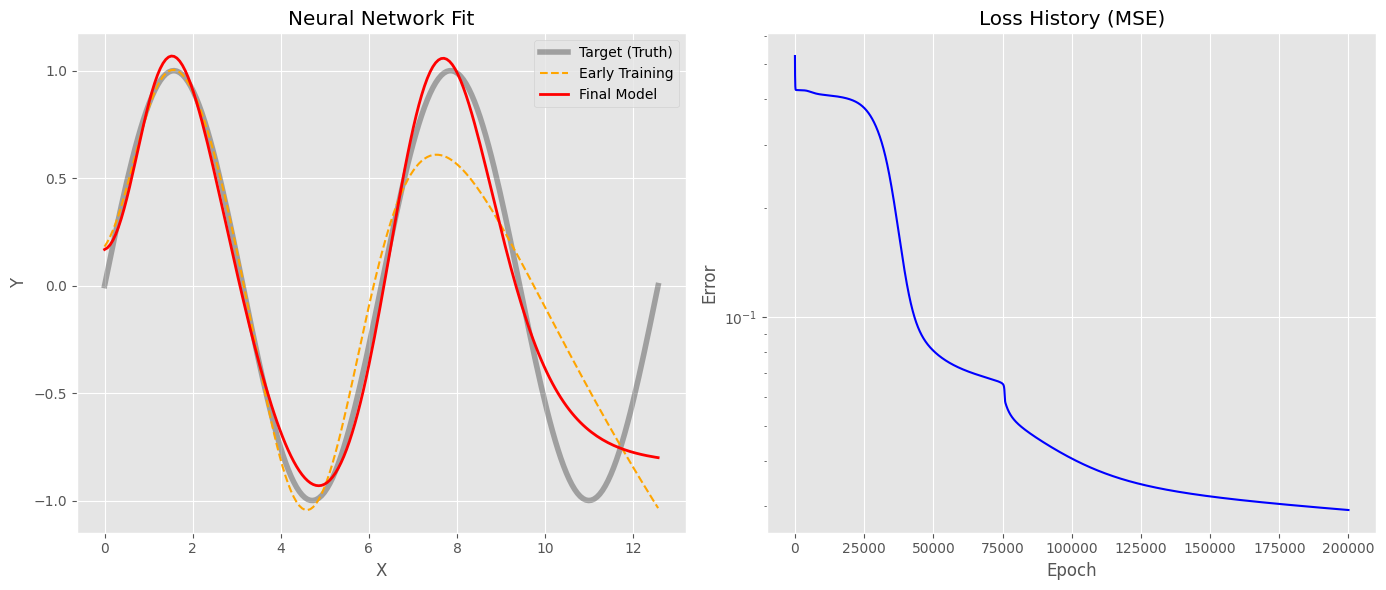

In [118]:
plt.figure(figsize=(14, 6))

# Plot 1: Function Approximation
plt.subplot(1, 2, 1)
plt.plot(X, Y, label="Target (Truth)", color="black", alpha=0.3, linewidth=4)
plt.plot(X, prediction_intermediate, label="Early Training", color="orange", linestyle="--")
plt.plot(X, prediction_final, label="Final Model", color="red", linewidth=2)
plt.title("Neural Network Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Plot 2: Learning Curve
plt.subplot(1, 2, 2)
plt.plot(loss_history, color="blue")
plt.title("Loss History (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.yscale("log") # Log scale helps see small error improvements

plt.tight_layout()
plt.show()